**2D Diffusion**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_2d_diffusion(nx=100, ny=100, nt=250, D=1.0, dt=0.1, dx=1.0, dy=1.0):
    # Stability constants 
    rx = (D * dt) / (dx**2)
    ry = (D * dt) / (dy**2)
    
    if (rx + ry) >= 0.5:
        print(f"Warning: Stability condition violated! rx + ry = {rx + ry}")

    # Initialize concentration grid 
    c = np.zeros((ny, nx))
    
    # Initial Condition (IC): Strip C=1 between nx/4 and 3nx/4
    c[:, int(nx/4):int(3*nx/4)] = 1.0
    
    # Time stepping
    for t in range(nt):
        cn = c.copy()
        # Vectorized 2D Finite Difference with Periodic BCs
        # Using np.roll for periodic boundary conditions 
        term_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
        term_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
        
        c = cn + rx * term_x + ry * term_y
        
    return c, rx, ry

# simulation 
nx, ny = 100, 100
final_c, rx, ry = solve_2d_diffusion(nx=nx, ny=ny, nt=250)

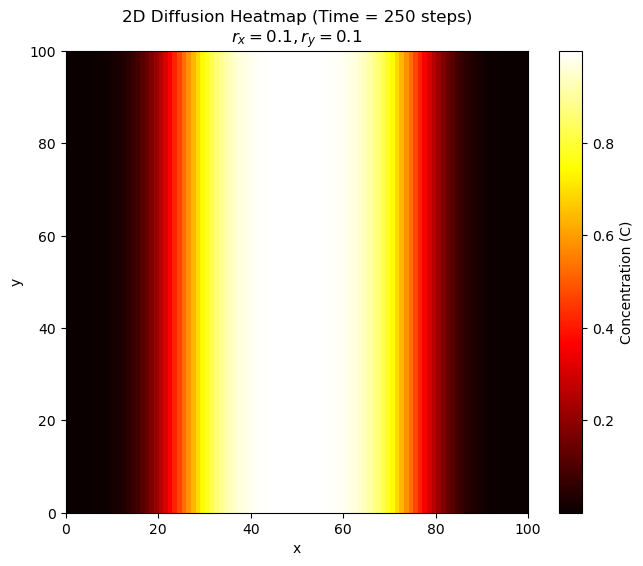

In [2]:
plt.figure(figsize=(8, 6))
plt.imshow(final_c, cmap='hot', origin='lower', extent=[0, nx, 0, ny])
plt.colorbar(label='Concentration (C)')
plt.title(f"2D Diffusion Heatmap (Time = 250 steps)\n$r_x={rx}, r_y={ry}$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

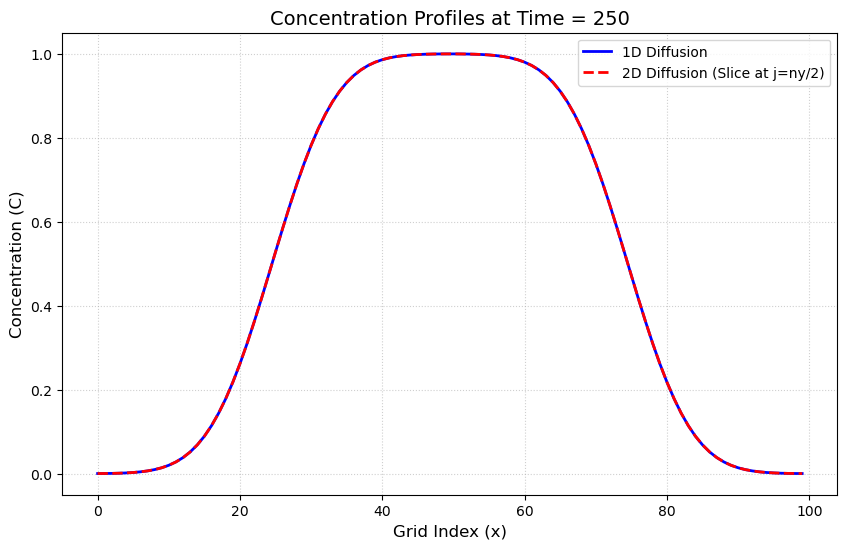

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters 
nx, ny = 100, 100    # Grid size
nt = 250            # Time steps (mentioned as "time = 250")
D = 1.0             # Diffusion coefficient
dt = 0.1            # Time step (set to 0.1 for 2D stability: rx + ry < 0.5)
dx, dy = 1.0, 1.0   # Spatial steps

rx = (D * dt) / (dx**2)
ry = (D * dt) / (dy**2)

#  1D Simulation 
c1d = np.zeros(nx)
# InitiL Condition 
c1d[nx//4 : 3*nx//4] = 1.0

for t in range(nt):
    cn = c1d.copy()
    # Finite difference with periodic boundary conditions
    c1d = cn + rx * (np.roll(cn, -1) - 2*cn + np.roll(cn, 1))

# 2D Simulation 
c2d = np.zeros((ny, nx))
# Initial Condition 2D
c2d[:, nx//4 : 3*nx//4] = 1.0

for t in range(nt):
    cn = c2d.copy()
    # 2D Finite Difference (rx * d2c/dx2 + ry * d2c/dy2)
    # np.roll handles the periodic BCs [c(nx, t) = c(0, t)]
    term_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
    term_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
    c2d = cn + rx * term_x + ry * term_y

#  Comparison Plot 
# We take a cross-section slice of the 2D results at the middle row (j = ny/2)
c2d_slice = c2d[ny//2, :]

plt.figure(figsize=(10, 6))
plt.plot(c1d, label='1D Diffusion', color='blue', linewidth=2)
plt.plot(c2d_slice, label='2D Diffusion (Slice at j=ny/2)', color='red', linestyle='--', linewidth=2)

# Aesthetics 
plt.title(f'Concentration Profiles at Time = {nt}', fontsize=14)
plt.xlabel('Grid Index (x)', fontsize=12)
plt.ylabel('Concentration (C)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(-0.05, 1.05)
plt.show()

 **Variable D**


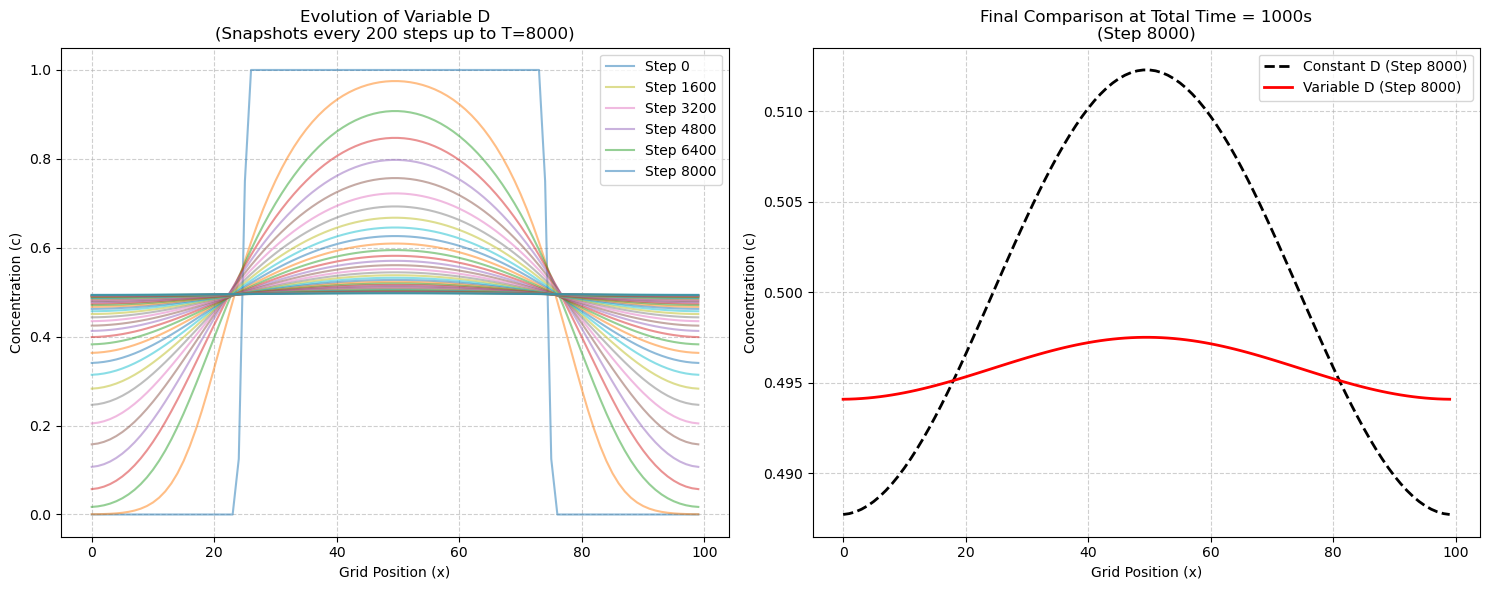

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuration from your notes
nx = 100
dx = 1.0
dt = 0.125            # dt = 0.125s
total_steps = 8000    # total timesteps = 8000
P = 1.0               # P = 1
Q = 2.0               # Q = 2
D_const = 1.0         # Reference constant D

def get_initial_condition(nx):
    c = np.zeros(nx)
    # Strip IC: C=1 between nx/4 and 3nx/4
    c[int(nx/4):int(3*nx/4)] = 1.0
    return c

# 2. Solvers
c_var = get_initial_condition(nx)
c_const = get_initial_condition(nx)
history_var = []

for step in range(total_steps + 1):
    # --- Variable D Logic ---
    # D(c) = P + Q*c^2
    cv = c_var.copy()
    dcdx = (np.roll(cv, -1) - np.roll(cv, 1)) / (2 * dx)
    d2cdx2 = (np.roll(cv, -1) - 2 * cv + np.roll(cv, 1)) / (dx**2)
    
    # Governing Eq: 2Qc(dc/dx)^2 + (P + Qc^2)(d2c/dx2)
    term1 = 2 * Q * cv * (dcdx**2)
    term2 = (P + Q * (cv**2)) * d2cdx2
    c_var = cv + dt * (term1 + term2)
    
    # --- Constant D Logic ---
    cc = c_const.copy()
    c_const = cc + dt * D_const * (np.roll(cc, -1) - 2 * cc + np.roll(cc, 1)) / (dx**2)

    # Store snapshots every 200 steps for the variable D plot
    if step % 200 == 0:
        history_var.append((step, c_var.copy()))

# 3. Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Evolution of Variable D (Snapshots every 200 steps)
plt.subplot(1, 2, 1)
# Plotting a subset of snapshots to keep the legend readable, or all if preferred
for i, (step, data) in enumerate(history_var):
    # Only label every 1600 steps to keep the legend clean, but plot all
    label = f"Step {step}" if step % 1600 == 0 or step == 8000 else None
    plt.plot(data, alpha=0.5, label=label)

plt.title(f"Evolution of Variable D\n(Snapshots every 200 steps up to T={total_steps})")
plt.xlabel("Grid Position (x)")
plt.ylabel("Concentration (c)")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Comparison at step 8000
plt.subplot(1, 2, 2)
plt.plot(c_const, 'k--', linewidth=2, label=f'Constant D (Step {total_steps})')
plt.plot(c_var, 'r-', linewidth=2, label=f'Variable D (Step {total_steps})')
plt.title(f"Final Comparison at Total Time = 1000s\n(Step {total_steps})")
plt.xlabel("Grid Position (x)")
plt.ylabel("Concentration (c)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

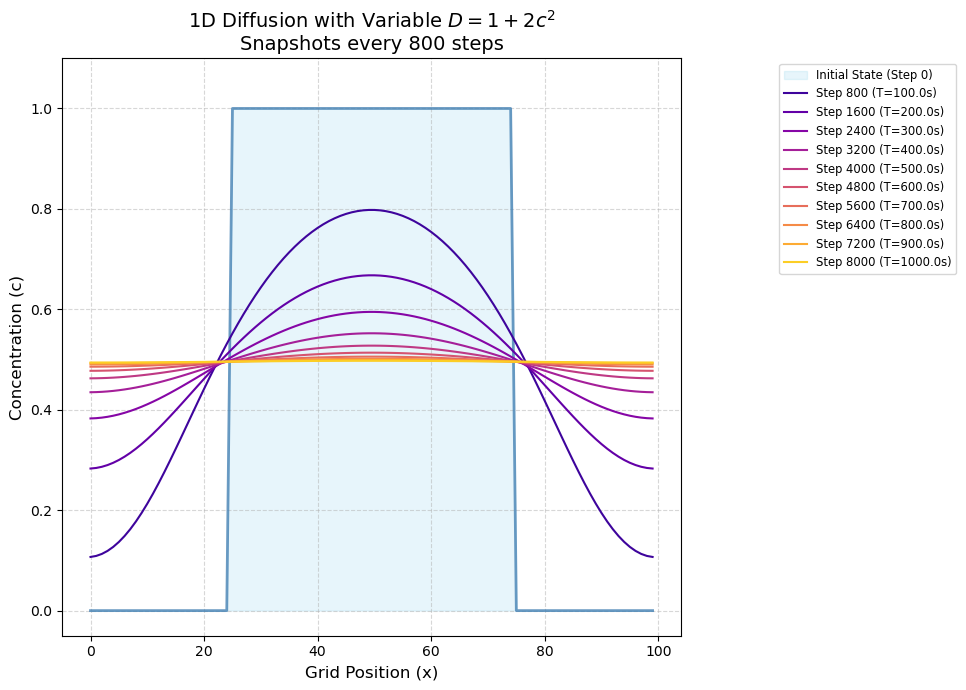

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# 1. Parameters from handwritten notes
nx = 100
dx = 1.0
dt = 0.125             # dt = 0.125s
total_steps = 8000     # total timesteps = 8000
save_every = 800       # "Save every 800.." from note
P, Q = 1.0, 2.0        # D = P + Q*c^2

# 2. Initialization
x = np.arange(nx)
c_var = np.zeros(nx)
# Initial Condition: Strip C=1 between nx/4 and 3nx/4
c_var[int(nx/4):int(3*nx/4)] = 1.0  
c_initial = c_var.copy()

# Setup Figure
fig, ax = plt.subplots(figsize=(10, 7))
ax.grid(True, linestyle='--', alpha=0.5)

# Shaded Initial Condition region
ax.fill_between(x, c_initial, color='skyblue', alpha=0.2, label='Initial State (Step 0)')
ax.plot(x, c_initial, color='steelblue', linewidth=2, alpha=0.8)

# Color mapping for 10 snapshots (8000 / 800)
colors = plt.cm.plasma(np.linspace(0, 0.9, (total_steps // save_every) + 1))

# 3. Simulation Loop
for t in range(1, total_steps + 1):
    cv = c_var.copy()
    
    # Finite Difference Derivatives
    # Using np.roll for periodic boundary conditions
    dcdx = (np.roll(cv, -1) - np.roll(cv, 1)) / (2 * dx)
    d2cdx2 = (np.roll(cv, -1) - 2 * cv + np.roll(cv, 1)) / (dx**2)
    
    # Derived Variable Diffusion Equation:
    # dc/dt = 2*Q*c*(dc/dx)^2 + (P + Q*c^2)*(d2c/dx^2)
    term1 = 2 * Q * cv * (dcdx**2)
    term2 = (P + Q * (cv**2)) * d2cdx2
    
    c_var = cv + dt * (term1 + term2)
    
    # Plot at every 800 steps
    if t % save_every == 0:
        ax.plot(x, c_var, color=colors[t // save_every], 
                 linewidth=1.5, label=f'Step {t} (T={t*dt}s)')

# 4. Formatting the Output
ax.set_title(f"1D Diffusion with Variable $D = 1 + 2c^2$\nSnapshots every {save_every} steps", fontsize=14)
ax.set_xlabel("Grid Position (x)", fontsize=12)
ax.set_ylabel("Concentration (c)", fontsize=12)
ax.set_ylim(-0.05, 1.1)
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize='small')

# # FIXED COLORBAR LOGIC:
# sm = ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(0, 1000))
# cbar = fig.colorbar(sm, ax=ax, pad=0.05)
# cbar.set_label('Total Simulation Time (Seconds)')

plt.tight_layout()
plt.show()

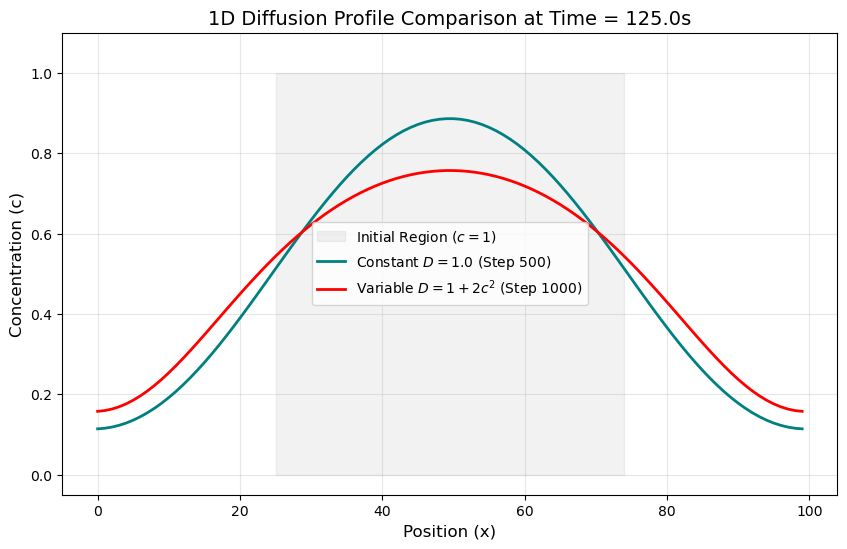

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compare_diffusion_models():
    # Grid Parameters
    nx = 100
    dx = 1.0
    target_time = 125.0
    
    # --- 1. Constant D Simulation (User provided parameters) ---
    dt_const = 0.25
    D_val = 1.0
    steps_const = int(target_time / dt_const) # 500 steps
    r_const = (D_val * dt_const) / (dx**2)
    
    c_const = np.zeros(nx)
    c_const[nx//4 : 3*nx//4] = 1.0
    
    for _ in range(steps_const):
        # Periodic BCs
        c_left = np.roll(c_const, 1)
        c_right = np.roll(c_const, -1)
        c_const = c_const + r_const * (c_left - 2.0 * c_const + c_right)
    
    # --- 2. Variable D Simulation (Note derived parameters) ---
    dt_var = 0.125
    steps_var = int(target_time / dt_var) # 1000 steps
    P, Q = 1.0, 2.0 # D = P + Q*c^2
    
    c_var = np.zeros(nx)
    c_var[nx//4 : 3*nx//4] = 1.0
    
    for _ in range(steps_var):
        cv = c_var.copy()
        # Non-linear derivatives from handwritten notes
        dcdx = (np.roll(cv, -1) - np.roll(cv, 1)) / (2 * dx)
        d2cdx2 = (np.roll(cv, -1) - 2 * cv + np.roll(cv, 1)) / (dx**2)
        
        # Governing Equation: 2Qc(dc/dx)^2 + (P + Qc^2)(d2c/dx^2)
        term1 = 2 * Q * cv * (dcdx**2)
        term2 = (P + Q * (cv**2)) * d2cdx2
        c_var = cv + dt_var * (term1 + term2)

    # --- 3. Plotting Together ---
    plt.figure(figsize=(10, 6))
    x = np.arange(nx)
    
    # Plot Initial Condition as background shaded area
    plt.fill_between(x, 0, 1.0, where=((x >= nx//4) & (x < 3*nx//4)), 
                     color='gray', alpha=0.1, label='Initial Region ($c=1$)')
    
    plt.plot(x, c_const, 'teal', linewidth=2, label=f'Constant $D=1.0$ (Step {steps_const})')
    plt.plot(x, c_var, 'red', linewidth=2, label=f'Variable $D=1+2c^2$ (Step {steps_var})')
    
    plt.title(f"1D Diffusion Profile Comparison at Time = {target_time}s", fontsize=14)
    plt.xlabel("Position (x)", fontsize=12)
    plt.ylabel("Concentration (c)", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.05, 1.1)
    
    plt.show()

compare_diffusion_models()

**Circular Concentration Profile in two dimentiona Diffusion**

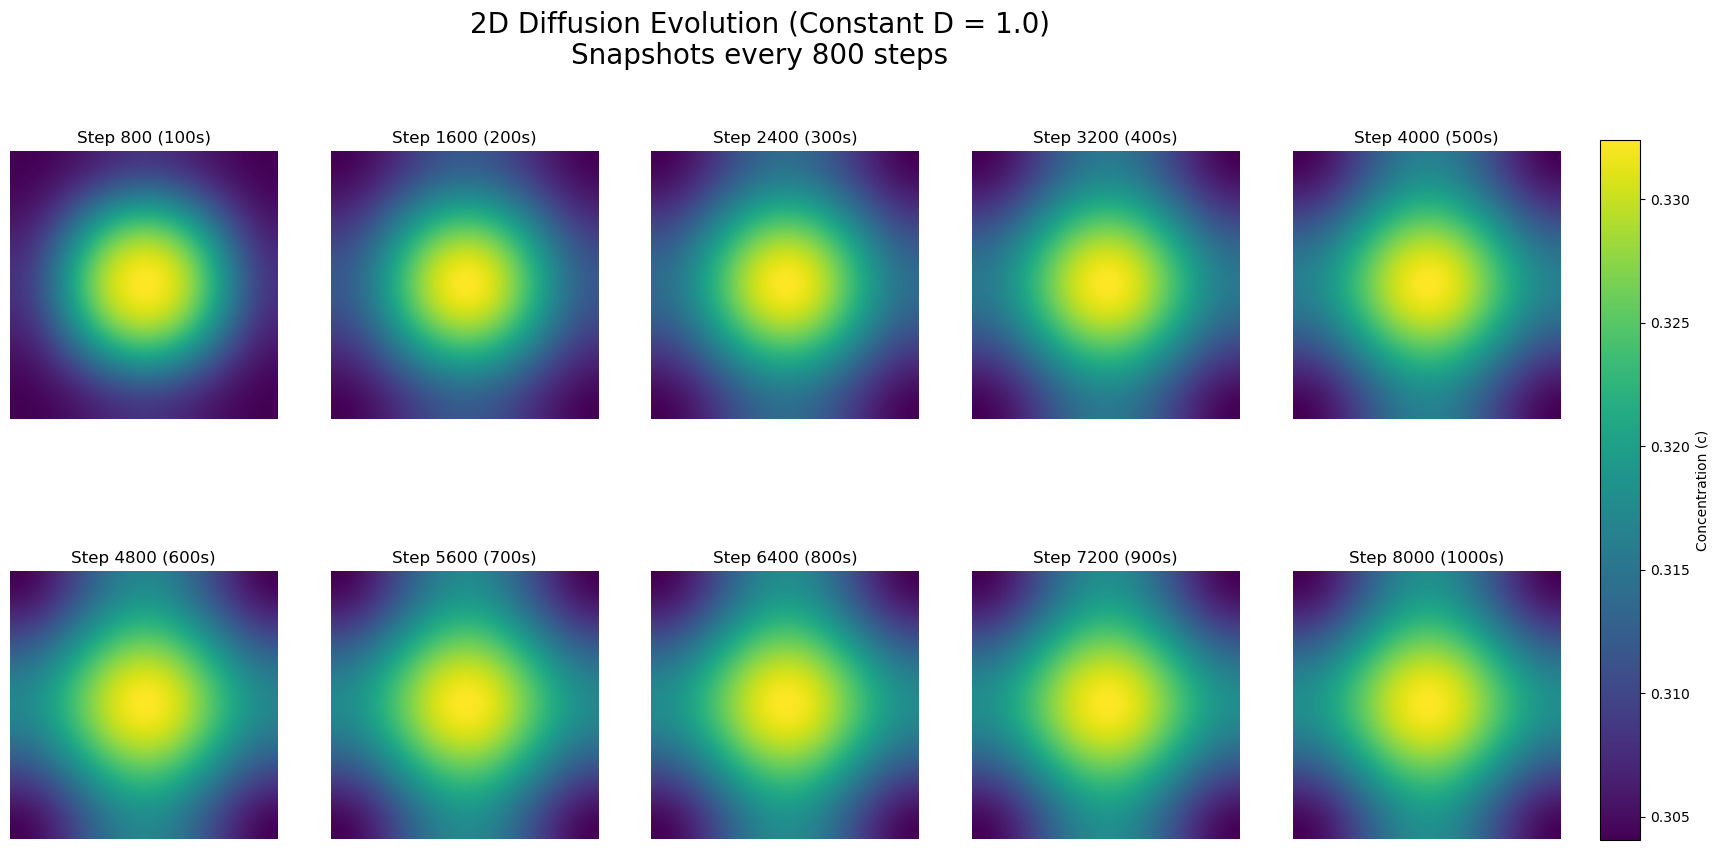

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuration based on your notes
nx, ny = 100, 100       # Grid size
dx, dy = 1.0, 1.0       # Spatial steps
D = 1.0                 # Constant diffusion coefficient
dt = 0.125              # Time step
total_steps = 8000      # Total timesteps
save_every = 800        # Plot interval

# 2. Initial Condition: Circle
# Radius calculation: r = sqrt(nx * ny) / pi
r = np.sqrt(nx * ny) / np.pi
c = np.zeros((ny, nx))
center_x, center_y = nx // 2, ny // 2

# Create coordinate grids
y_indices, x_indices = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)
c[dist_from_center <= r] = 1.0

# 3. Simulation Setup
# Stability constant for 2D: (D*dt/dx^2) + (D*dt/dy^2) = 0.25 <= 0.5
rx = (D * dt) / (dx**2)
ry = (D * dt) / (dy**2)

snapshots = []
times = []

# 4. Simulation Loop
curr_c = c.copy()
for t in range(1, total_steps + 1):
    cn = curr_c.copy()
    
    # 2D Finite Difference with Periodic Boundary Conditions
    laplacian_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
    laplacian_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
    
    curr_c = cn + rx * laplacian_x + ry * laplacian_y
    
    # Capture snapshot every 800 steps
    if t % save_every == 0:
        snapshots.append(curr_c.copy())
        times.append(t * dt)

# 5. Plotting (2 rows, 5 columns for 10 snapshots)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes_flat = axes.flatten()

for i in range(len(snapshots)):
    im = axes_flat[i].imshow(snapshots[i], cmap='viridis', origin='lower', extent=[0, nx, 0, ny])
    axes_flat[i].set_title(f"Step {800*(i+1)} ({int(times[i])}s)", fontsize=12)
    axes_flat[i].axis('off')

# Global formatting
plt.suptitle(f"2D Diffusion Evolution (Constant D = {D})\nSnapshots every {save_every} steps", fontsize=20)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Concentration (c)')

plt.show()

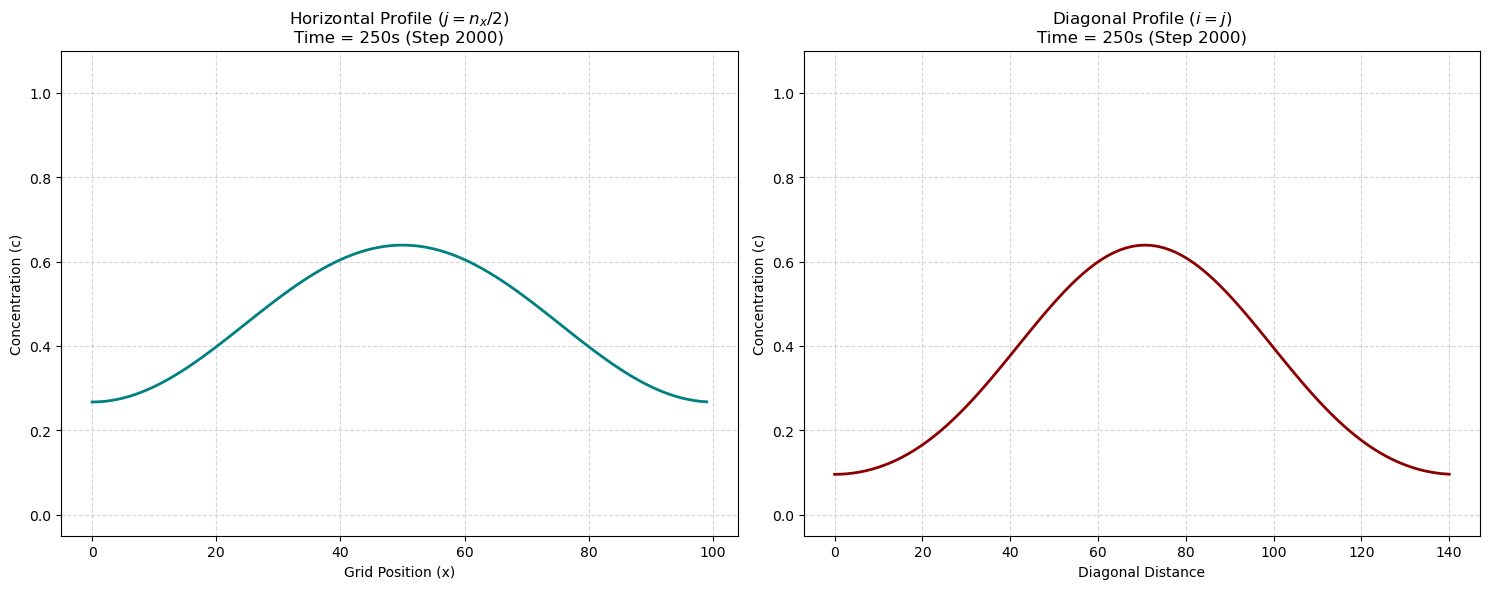

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters from your requirements and notes
nx, ny = 100, 100
dx, dy = 1.0, 1.0
dt = 0.125                 # dt = 0.125s
D_const = 1.0              # Constant D = 1
target_time = 250          # Target time = 250s
total_steps = int(target_time / dt) # 2000 steps

# 2. Initial Condition: Circle
# r = sqrt(nx * ny) / pi
r = np.sqrt(nx * ny) / np.pi
c = np.zeros((ny, nx))
center_x, center_y = nx // 2, ny // 2

y_indices, x_indices = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)
c[dist_from_center <= r] = 1.0

# 3. Simulation Loop (Constant D)
# Stability check for 2D: (D*dt/dx^2) + (D*dt/dy^2) = 0.125 + 0.125 = 0.25 <= 0.5
rx = (D_const * dt) / (dx**2)
ry = (D_const * dt) / (dy**2)

for step in range(1, total_steps + 1):
    cn = c.copy()
    
    # 2D Finite Difference Update
    # Using np.roll for periodic boundary conditions
    laplacian_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
    laplacian_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
    
    c = cn + rx * laplacian_x + ry * laplacian_y

# 4. Extracting Profiles at T = 250s
# Profile 1: Horizontal line j = nx/2 (center row)
horizontal_profile = c[center_y, :]

# Profile 2: Diagonal line i = j
diagonal_profile = np.diag(c)
# Diagonal distance: sqrt(2) * grid index
diag_coords = np.sqrt(2) * np.arange(len(diagonal_profile))

# 5. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Horizontal Profile Plot
ax1.plot(np.arange(nx), horizontal_profile, color='teal', linewidth=2)
ax1.set_title(f"Horizontal Profile ($j = n_x/2$)\nTime = {target_time}s (Step {total_steps})")
ax1.set_xlabel("Grid Position (x)")
ax1.set_ylabel("Concentration (c)")
ax1.set_ylim(-0.05, 1.1)
ax1.grid(True, linestyle='--', alpha=0.5)

# Diagonal Profile Plot
ax2.plot(diag_coords, diagonal_profile, color='darkred', linewidth=2)
ax2.set_title(f"Diagonal Profile ($i = j$)\nTime = {target_time}s (Step {total_steps})")
ax2.set_xlabel("Diagonal Distance")
ax2.set_ylabel("Concentration (c)")
ax2.set_ylim(-0.05, 1.1)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

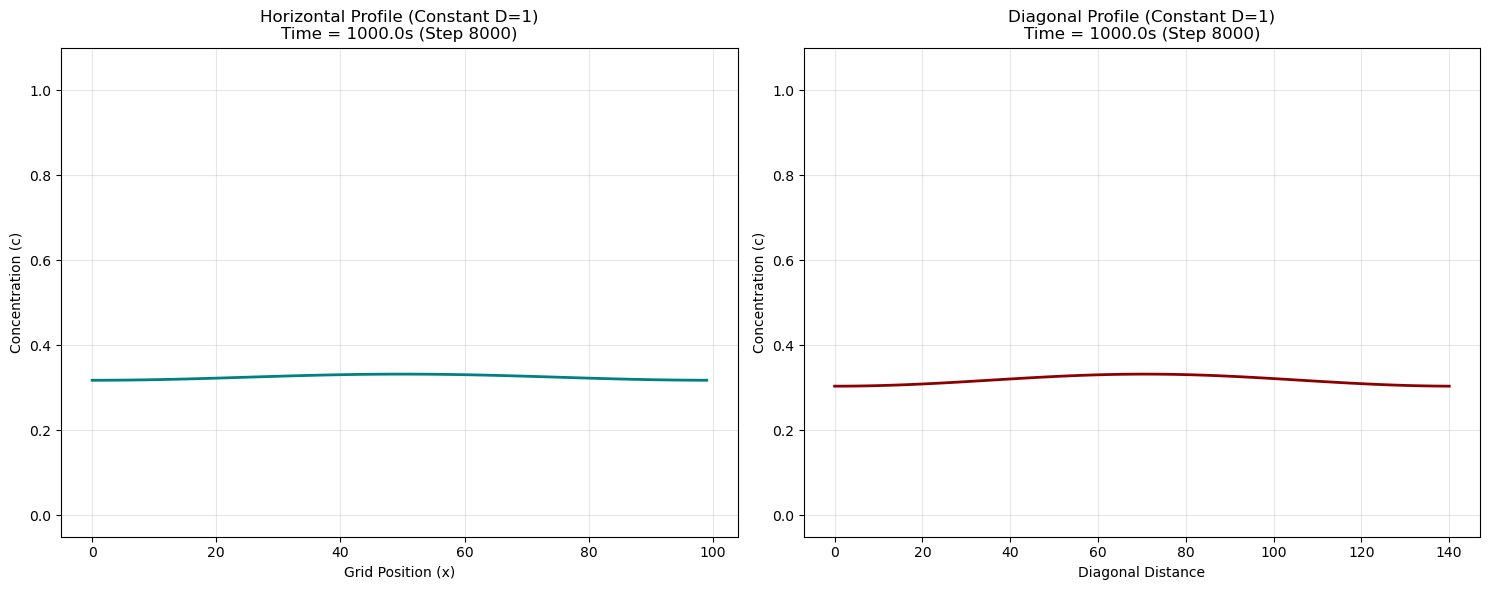

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters strictly following your request
nx, ny = 100, 100
dx, dy = 1.0, 1.0
dt = 0.125                 # Requested dt
total_steps = 8000         # Requested total steps
D_const = 1.0              # Requested constant D
target_time = total_steps * dt # 1000 seconds

# 2. Initial Condition: Circle
# Radius calculation from your notes: r = sqrt(nx * ny) / pi
r = np.sqrt(nx * ny) / np.pi
c = np.zeros((ny, nx))
center_x, center_y = nx // 2, ny // 2

y_indices, x_indices = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)
c[dist_from_center <= r] = 1.0

# 3. Simulation Loop
# Using r = (D * dt) / dx^2 stability constant logic from your code
rx = (D_const * dt) / (dx**2)
ry = (D_const * dt) / (dy**2)

for step in range(1, total_steps + 1):
    cn = c.copy()
    
    # 2D Finite Difference Update with Periodic BCs
    laplacian_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
    laplacian_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
    
    c = cn + rx * laplacian_x + ry * laplacian_y

# 4. Extracting Profiles at T = 1000s
horizontal_profile = c[center_y, :]
diagonal_profile = np.diag(c)
diag_coords = np.sqrt(2) * np.arange(len(diagonal_profile))

# 5. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Horizontal Profile
ax1.plot(np.arange(nx), horizontal_profile, color='teal', linewidth=2)
ax1.set_title(f"Horizontal Profile (Constant D=1)\nTime = {target_time}s (Step {total_steps})")
ax1.set_xlabel("Grid Position (x)")
ax1.set_ylabel("Concentration (c)")
ax1.set_ylim(-0.05, 1.1)
ax1.grid(True, alpha=0.3)

# Diagonal Profile
ax2.plot(diag_coords, diagonal_profile, color='darkred', linewidth=2)
ax2.set_title(f"Diagonal Profile (Constant D=1)\nTime = {target_time}s (Step {total_steps})")
ax2.set_xlabel("Diagonal Distance")
ax2.set_ylabel("Concentration (c)")
ax2.set_ylim(-0.05, 1.1)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

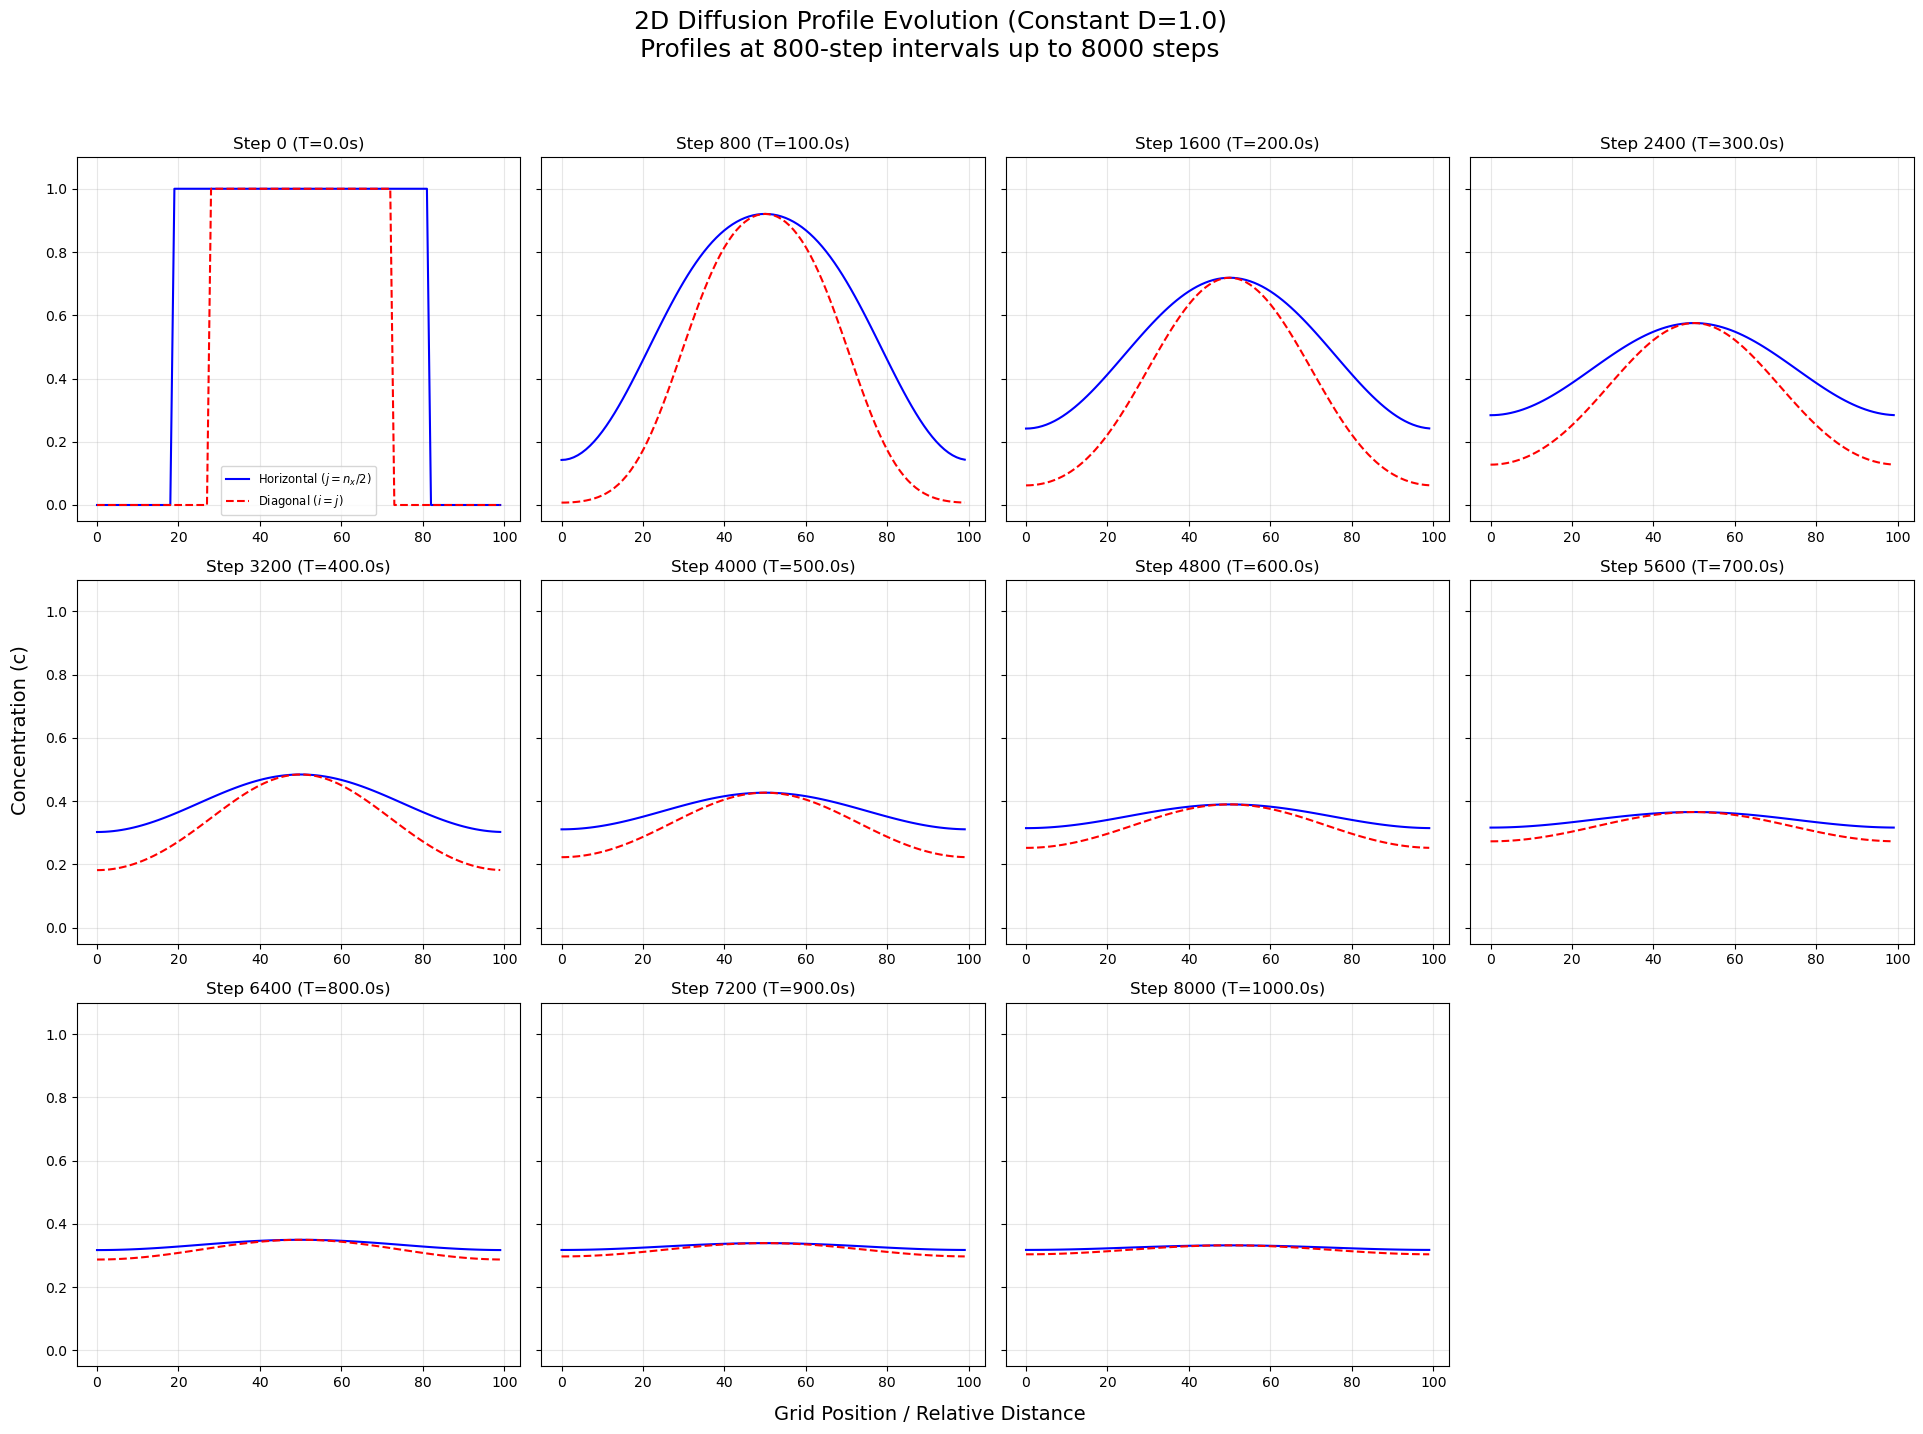

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
nx, ny = 100, 100
dx, dy = 1.0, 1.0
dt = 0.125                 # dt = 0.125s
D_const = 1.0              # Constant D
total_steps = 8000         # Total steps
save_every = 800           # Interval

# 2. Initial Condition: Circle
# r = sqrt(nx * ny) / pi
r = np.sqrt(nx * ny) / np.pi
c = np.zeros((ny, nx))
center_x, center_y = nx // 2, ny // 2

y_indices, x_indices = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)
c[dist_from_center <= r] = 1.0

# Store initial state for Step 0
snapshots = [(0, c.copy())]

# 3. Simulation Loop
rx = (D_const * dt) / (dx**2)
ry = (D_const * dt) / (dy**2)

curr_c = c.copy()
for t in range(1, total_steps + 1):
    cn = curr_c.copy()
    
    # 2D Finite Difference with Periodic BCs
    laplacian_x = np.roll(cn, -1, axis=1) - 2*cn + np.roll(cn, 1, axis=1)
    laplacian_y = np.roll(cn, -1, axis=0) - 2*cn + np.roll(cn, 1, axis=0)
    
    curr_c = cn + rx * laplacian_x + ry * laplacian_y
    
    # Save every 800 steps
    if t % save_every == 0:
        snapshots.append((t, curr_c.copy()))

# 4. Plotting 11 Graphs (3 rows x 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
axes_flat = axes.flatten()

x_axis = np.arange(nx)
diag_axis = np.linspace(0, nx, nx) # Normalized for comparison

for i, (step, data) in enumerate(snapshots):
    ax = axes_flat[i]
    
    # Extract precise profiles
    horiz = data[center_y, :]
    diag = np.diag(data)
    
    # Plotting 1D lines for concentration profiles
    ax.plot(x_axis, horiz, 'b-', label='Horizontal ($j=n_x/2$)')
    ax.plot(x_axis, diag, 'r--', label='Diagonal ($i=j$)')
    
    ax.set_title(f"Step {step} (T={step*dt}s)", fontsize=12)
    ax.set_ylim(-0.05, 1.1)
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend(fontsize='small')

# Remove empty 12th subplot
fig.delaxes(axes_flat[-1])

# Labels and Global Layout
fig.text(0.5, 0.04, 'Grid Position / Relative Distance', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Concentration (c)', va='center', rotation='vertical', fontsize=14)
plt.suptitle(f"2D Diffusion Profile Evolution (Constant D=1.0)\nProfiles at 800-step intervals up to {total_steps} steps", fontsize=18)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()